In [1]:
from __future__ import annotations
import numpy as np
from scipy import integrate
from scipy import special
from matplotlib import pyplot as plt
from typing import Optional
import os
from scipy.constants import physical_constants as constants

import torch
from torch import nn
from torch import optim
from tqdm import trange

temperature_unit = 'K'
time_unit = 'fs'
energy_unit = '/cm'

au2fs = 0.02418884254
au2cm = 219474.6305
au2kelvin = 3.1577465e5 

PI = np.pi

In [10]:
int_freq_min = (1.0e-7 / au2cm ) 
int_freq_max = (1.0e7 / au2cm) 
int_num = 100000
n_pts = int(5000)
t_learn = (1.0e3 / au2fs) 
t_test = t_learn
t_min = (1.0e-3 / au2fs) 
learn_domain = np.linspace(0, t_learn, num=n_pts)
log_domain = np.logspace(np.log2(t_min), np.log2(t_learn), num=n_pts, base=2)

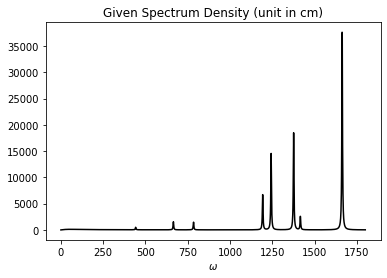

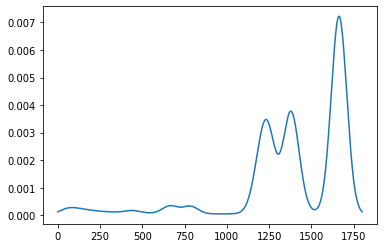

0.04134137457575099


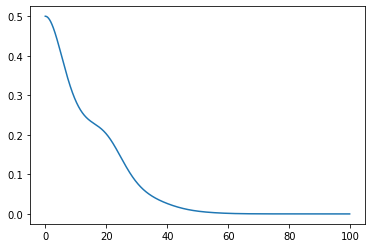

"learn_s = np.array([_re(d, w/ au2cm, beta, t_i) for t_i in learn_domain])\nlearn_a = np.array([_im(d, w/ au2cm, beta, t_i) for t_i in learn_domain])\nfig = plt.figure(figsize = (10,7))\nax1 = plt.subplot(211)\nax2 = plt.subplot(212)\nax1.plot(learn_domain* au2fs, learn_s)\nax2.plot(learn_domain* au2fs, learn_a)\nax1.set_title('Real Part')\nax2.set_title('Imag Part')\nax2.set_xlabel('t(fs)')\nfig.supylabel('BCF')\nplt.show()"

In [8]:
beta = 1052.6

file = open('SPD-TMP.txt','r')
sd = np.loadtxt(file, delimiter = "\t", dtype = float)
w = sd[:, 0]
col_2 = sd[:, 1]
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
plt.plot(w, col_2, 'k-')
plt.xlabel('$\omega$')
plt.title('Given Spectrum Density (unit in cm)')
plt.show()

def _re(j, w, beta, t):
    # want to integrate over for ever t in the lest
    y = j * np.cos(w * t) / np.tanh(beta * w / 2.0)
    return integrate.simpson(y, x=w)
def _im(j, w, beta, t):
    y = j * np.sin(w * t)
    return -integrate.simpson(y, x=w)
beta = 1052.6
def Gaussian(x, x0, sigma):
    return np.exp(-(x - x0)**2/(2*sigma**2))/(2 * np.pi*sigma**2)

w = sd[1:, 0]
x = np.linspace(-100, 100, len(w))
d = np.convolve(sd[1:, 1] / au2cm, Gaussian(x, 0, 5),'same')

def Gamma(j, w, beta, t):
    y = j/w**2 * (1 - np.cos(w * t))/ np.tanh(beta * w / 2.0)
    return -integrate.simpson(y, x=w)

plt.plot(w, d)#sd[1:, 1]/ au2cm)
plt.show()
#d = sd[1:, 1] / au2cm               


t_range = np.where(learn_domain*au2fs <= 100)
t = learn_domain[t_range]
print(t[0])
r_t = np.array([Gamma(d , w/au2cm, beta, t_i) for t_i in t])
plt.plot(t*au2fs, np.exp(r_t)/2 ,label = "$\Gamma(t)$")
plt.show()

"""learn_s = np.array([_re(d, w/ au2cm, beta, t_i) for t_i in learn_domain])
learn_a = np.array([_im(d, w/ au2cm, beta, t_i) for t_i in learn_domain])
fig = plt.figure(figsize = (10,7))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.plot(learn_domain* au2fs, learn_s)
ax2.plot(learn_domain* au2fs, learn_a)
ax1.set_title('Real Part')
ax2.set_title('Imag Part')
ax2.set_xlabel('t(fs)')
fig.supylabel('BCF')
plt.show()"""

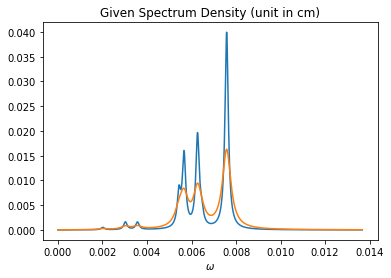

In [5]:
file = open('spd.txt', 'r')
file1 = open('spd (1).txt', 'r')
origin = np.loadtxt(file ,delimiter = " ")#, dtype = complex)
omg = origin[:, 0]+1e-6
j = origin[:, 1]
origin1 = np.loadtxt(file1,delimiter = " ")#, dtype = complex)
omg1 = origin1[:, 0]+1e-6
j1 = origin1[:, 1]
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
plt.plot(omg1/ au2cm, j1/ au2cm)
plt.plot(omg/ au2cm, j/ au2cm)
plt.xlabel('$\omega$')
plt.title('Given Spectrum Density (unit in cm)')
plt.show()

learn_s = np.array([_re(j/ au2cm, omg/ au2cm, beta, t_i) for t_i in learn_domain])
learn_a = np.array([_im(j/ au2cm, omg/ au2cm, beta, t_i) for t_i in learn_domain])
learn_s1 = np.array([_re(j1/ au2cm, omg1/ au2cm, beta, t_i) for t_i in learn_domain])
learn_a1 = np.array([_im(j1/ au2cm, omg1/ au2cm, beta, t_i) for t_i in learn_domain])

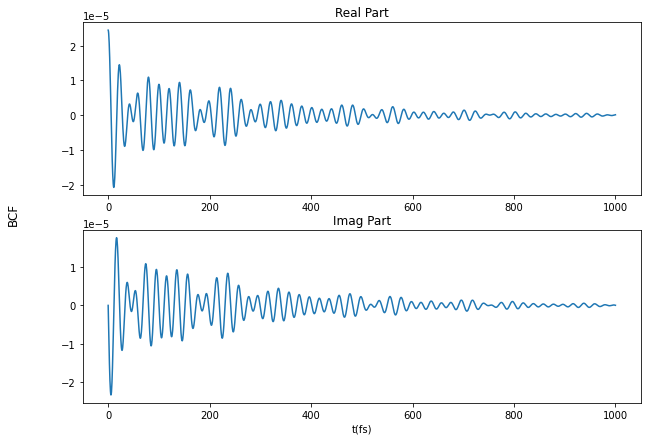

In [28]:
fig = plt.figure(figsize = (10,7))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.plot(learn_domain* au2fs, learn_s1)
ax2.plot(learn_domain* au2fs, learn_a1)
ax1.set_title('Real Part')
ax2.set_title('Imag Part')
ax2.set_xlabel('t(fs)')
fig.supylabel('BCF')
plt.show()

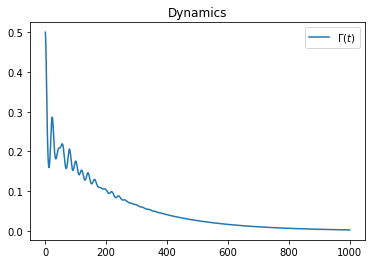

In [59]:
#omg_ = np.where(omg1/au2cm <= 2000)
#from scipy import interpolate
#f = interpolate.interp1d(omg/au2cm, j/au2cm, fill_value="extrapolate")
j_new = f(w_new) 
r_t = np.array([Gamma(j_new , w_new, beta, t_i) for t_i in learn_domain])

#file = open('SPDTMD_wide_Dynamic_try.txt', 'r')
#dr = np.loadtxt(file ,delimiter = " ", dtype = complex)
plt.title('Dynamics')
#time = dr[:, 0].real
#rdo01 = abs(dr[:, 2])
#plt.plot(time*au2fs, rdo01, label = "fit")
plt.plot(learn_domain*au2fs, np.exp(r_t)/2 ,label = "$\Gamma(t)$")
#plt.xlim(0,100)
plt.legend()
plt.show()

In [3]:
s = """{
"freq_b": [1663,
            1416,
            1376,        
            1243,        
            1193,        
            784,        
            665,        
            442    ],    
 "re_b": [330.0,        
          25.6,        
          186.0,        
          161.7,        
          77.3,        
          26.5,        
          32.0,        
          14.9    ],    
 "re_d": 715.73,    
 "width_b": [        
             30.0,        
             30.0,        
             30.0,        
             30.0,        
             30.0,        
             30.0,        
             30.0,        
             30.0   ],    
 "width_d": 54.45}"""
import json5 as json
params = json.loads(s)
params

{'freq_b': [1663, 1416, 1376, 1243, 1193, 784, 665, 442],
 're_b': [330.0, 25.6, 186.0, 161.7, 77.3, 26.5, 32.0, 14.9],
 're_d': 715.73,
 'width_b': [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0],
 'width_d': 54.45}

In [4]:
freq_b = params['freq_b']
re_b = params['re_b']
width_b = params['width_b']
width_d = params['width_d']
re_d = params['re_d']
dr_para = np.zeros((2,))
dr_para[0] = width_d
dr_para[1] = re_d
br_para = np.zeros((3, len(freq_b)))# each mode can be found by calling br_para[:, i]
br_para[0] = width_b
br_para[1] = re_b
br_para[2] = freq_b

In [5]:
int_freq_min = (1.0e-6 / au2cm )
int_freq_max = (1.0e6 / au2cm)
int_num = 100000
w_new = np.logspace(np.log2(1.0e-6), np.log2(1.0e6), num=int_num, base=2)
sp = (2.0 / np.pi) * dr_para[1] * dr_para[0] * w_new / (w_new**2 + dr_para[0]**2)
for i in range(len(freq_b)):
    y = (4.0 / np.pi) * br_para[1,i] * br_para[0,i] * (br_para[2,i]**2 + br_para[0,i]**2) * w_new / ((w_new + br_para[2,i])**2 +  br_para[0,i]**2) / ((w_new - br_para[2,i])**2 + br_para[0,i]**2)
    sp += y

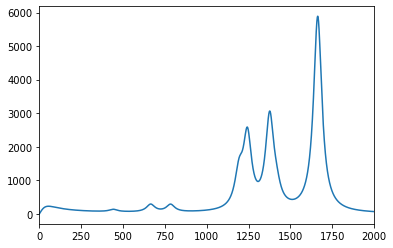

In [9]:
r_t = np.array([Gamma(sp/au2cm , w_new/au2cm, beta, t_i) for t_i in learn_domain])
plt.plot(w_new, sp)
plt.xlim(0,2000)
plt.show()

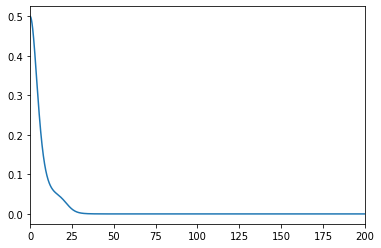

In [10]:
plt.plot(learn_domain*au2fs, np.exp(r_t)/2)
plt.xlim(0,200)
plt.show()

In [11]:
#learn_domain = np.linspace(0, t_learn, num=2000)#int(n_pts))
learn_s_log = np.array([_re(sp/ au2cm, w_new/ au2cm, beta, t_i) for t_i in log_domain])
learn_a_log = np.array([_im(sp/ au2cm, w_new/ au2cm, beta, t_i) for t_i in log_domain])
learn_s2 = np.array([_re(sp/ au2cm, w_new/ au2cm, beta, t_i) for t_i in learn_domain])
learn_a2 = np.array([_im(sp/ au2cm, w_new/ au2cm, beta, t_i) for t_i in learn_domain])

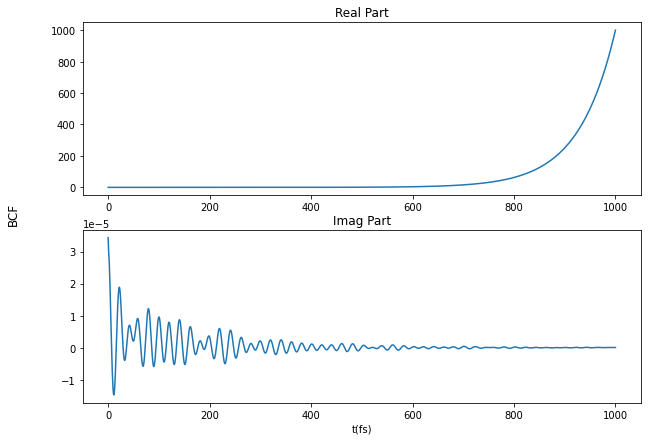

In [14]:
fig = plt.figure(figsize = (10,7))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
#ax1.plot(learn_domain* au2fs, learn_s2)
#ax2.plot(learn_domain* au2fs, learn_a2)
ax1.plot(learn_domain* au2fs, log_domain* au2fs)
ax2.plot(log_domain* au2fs, learn_s_log)
ax1.set_title('Real Part')
ax2.set_title('Imag Part')
ax2.set_xlabel('t(fs)')
fig.supylabel('BCF')
plt.show()

In [15]:
np.savetxt('bcf_4_8.csv',[learn_s2,learn_a2], delimiter=',')
np.savetxt('bcf_4_9.csv',[learn_s_log,learn_a_log], delimiter=',')

In [21]:
np.savetxt('sp_3_21.csv', [w_new, sp], delimiter=',')